In [1]:
import FinanceDataReader as fdr
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
fname = 'C:\Windows\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=fname).get_name()
matplotlib.rc('font', family = font_name)

def get_stockdata(stock_code):
    global stock_data
    # 개장하지 않은 날 0인 데이터를 전 날 데이터로 채움
    stock_data[stock_code].replace(0,np.nan,inplace=True)
    stock_data[stock_code] = stock_data[stock_code].ffill()
    return stock_data[stock_code]

stock = {}
with open('네이버증권_반도체종목.txt','r', encoding='UTF-8') as f:
  lines = f.readlines()
  for idx, line in enumerate(lines[::6]):
    stock[line.strip()] = lines[idx*6+1].strip()
print(stock)

stock_data = {}
def downlaod_stockdata():
  global stock_data
  for value in stock.values():
    df = fdr.DataReader(value)
    stock_data[value] = df

krx = fdr.StockListing('KRX')
downlaod_stockdata()

{'자람테크놀로지': '389020', 'GST': '083450', '시그네틱스': '033170', '넥스트칩': '396270', '엑시콘': '092870', '유니테스트': '086390', '테크윙': '089030', '유니셈': '036200', '티이엠씨': '425040', '한솔아이원스': '114810', '에이직랜드': '445090', '큐엠씨': '136660', '타이거일렉': '219130', '네패스아크': '330860', '텔레칩스': '054450', '와이아이케이': '232140', '티엘비': '356860', '큐알티': '405100', '지앤비에스 에코': '382800', '퀄리타스반도체': '432720', '예스티': '122640', '네오셈': '253590', '디아이': '003160', '코스텍시스템': '169670', '제우스': '079370', '아이텍': '119830', '하나마이크론': '067310', '에프에스티': '036810', '에이디테크놀로지': '200710', '미래산업': '025560', '유니퀘스트': '077500', '피에스케이': '319660', 'ISC': '095340', '아이엠티': '451220', '그린리소스': '402490', '코미코': '183300', '가온칩스': '399720', '엠케이전자': '033160', '신성이엔지': '011930', '디엔에프': '092070', '다원넥스뷰': '323350', '티씨케이': '064760', '티엘엔지니어링': '413300', '두산테스나': '131970', '아진엑스텍': '059120', '로체시스템즈': '071280', 'KEC': '092220', '오션브릿지': '241790', '제이엔비': '452160', '지오엘리먼트': '311320', '에이엘티': '172670', '네패스': '033640', '오픈엣지테크놀로지': '394280', '워트': '39647

In [2]:
with open('./csv_origin/only_code.csv', 'r') as f:
    code_data = f.readlines()
    tmp = []
    for line in code_data:
        tmp.extend(line.split(','))  # 각 라인을 쉼표로 분할하여 tmp 리스트에 추가합니다.
    code_data = tmp

for code in code_data:
    url = 'http://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&gicode='+code[:-1]+'&cID=&MenuYn=Y&ReportGB=&NewMenuID=101&stkGb=701'
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    data = []
    table = soup.find(id = 'highlight_B_Q')
    
    header = table.text.strip()
    header_text = header.split(',')

    headers = []
    for item in header_text:
        cleaned_item = re.sub(r'\(E\) : Estimate\n컨센서스 추정치\n', '', item)
        headers.extend(re.findall(r'\d{4}/\d{2}', cleaned_item))
    data.append(headers[:-3])
    
    for row in table.find('tbody').find_all('tr'):
        tmp = [cell.text.strip() for cell in row.find_all('td')]
        data.append(tmp[:-3])

    columns = [th.text.strip() for th in table.find('tbody').find_all('th')]
    columns.insert(0, 'net quarter')

    df = pd.DataFrame(data, columns)
    df=df.transpose()
    
    # df.to_csv('./data_csv/'+code[:-1]+'.csv', index=False)

In [17]:
company_code = input("code input(ex: A123456): ")
option_columns = ["매출액", "영업이익", "영업이익(발표기준)", "당기순이익", "자산총계", "부채총계", "자본총계", "자본금", "부채비율(%)", "유보율(%)", "영업이익률(%)", "순이익률(%)", "ROA(%)", "ROE(%)", "EPS", "BPS", "DPS", "PER", "PBR", "발행주식수", "배당수익률"]
selected_columns = []

while True:
    print(option_columns)
    tmp = (input('input cloumns: '))
    if(tmp not in option_columns):
        print("Wrong option")
        continue
    else:
        if(tmp in selected_columns):
            print("selected columns detected!, next steps")
            break
        else:
            selected_columns.append(tmp)
            print(selected_columns)

x_axis = []
y_axis = {}
refine = []
with open('./data_csv/'+company_code+'.csv', 'r', encoding='UTF-8') as f:
    data = f.readlines()
    for line in data:
        tmp = line.split(',')
        refine.append(tmp)
for i in refine[1:]:
    x_axis.append(i[0])
for i in selected_columns:
    num = refine[0].index(i)
    tmp = []
    for j in refine[1:]:
        tmp.append(j[num])
    y_axis[i] = tmp



code input(ex: A123456):  A389020


['매출액', '영업이익', '영업이익(발표기준)', '당기순이익', '자산총계', '부채총계', '자본총계', '자본금', '부채비율(%)', '유보율(%)', '영업이익률(%)', '순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS', 'BPS', 'DPS', 'PER', 'PBR', '발행주식수', '배당수익률']


input cloumns:  매출액


['매출액']
['매출액', '영업이익', '영업이익(발표기준)', '당기순이익', '자산총계', '부채총계', '자본총계', '자본금', '부채비율(%)', '유보율(%)', '영업이익률(%)', '순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS', 'BPS', 'DPS', 'PER', 'PBR', '발행주식수', '배당수익률']


input cloumns:  매출액


selected columns detected!, next steps


In [16]:
selected_stock_data = get_stockdata(company_code[1:])
tmp = []
for i in x_axis:
    price_data = selected_stock_data[i+'/01':i+'/01']['Close'].values
    # 주가가 존재하면 리스트에 첫 번째 값을, 없으면 None 추가
    if len(price_data) > 0:
        tmp.append(int(price_data[0]))
    else:
        tmp.append(None)
        
# y_axis['주가'] = tmp
print(refine)
refine = refine[1:0]
refine.append(tmp)
print(refine)
# # print(y_axis)
# # y_axis_df = pd.DataFrame(y_axis)
# # y_axis_df.corr()
# refin
refine_df = pd.DataFrame(refine_df)
refine_df.corr()
# # df = pd.DataFrame(y_axis)
# 분할된 데이터프레임 생성

# 상관관계 계산
correlation_matrix = refine_df.corr()
print(correlation_matrix)
# # 데이터 분할
# result = pd.DataFrame(df.apply(tuple, axis=1).tolist(), columns=df.columns)
# result.corr()
# # print(result)

[[None, None, 38000, 32050, 27350]]
[[None, None, 38000, 32050, 27350]]
     매출액  주가
매출액  NaN NaN
주가   NaN NaN


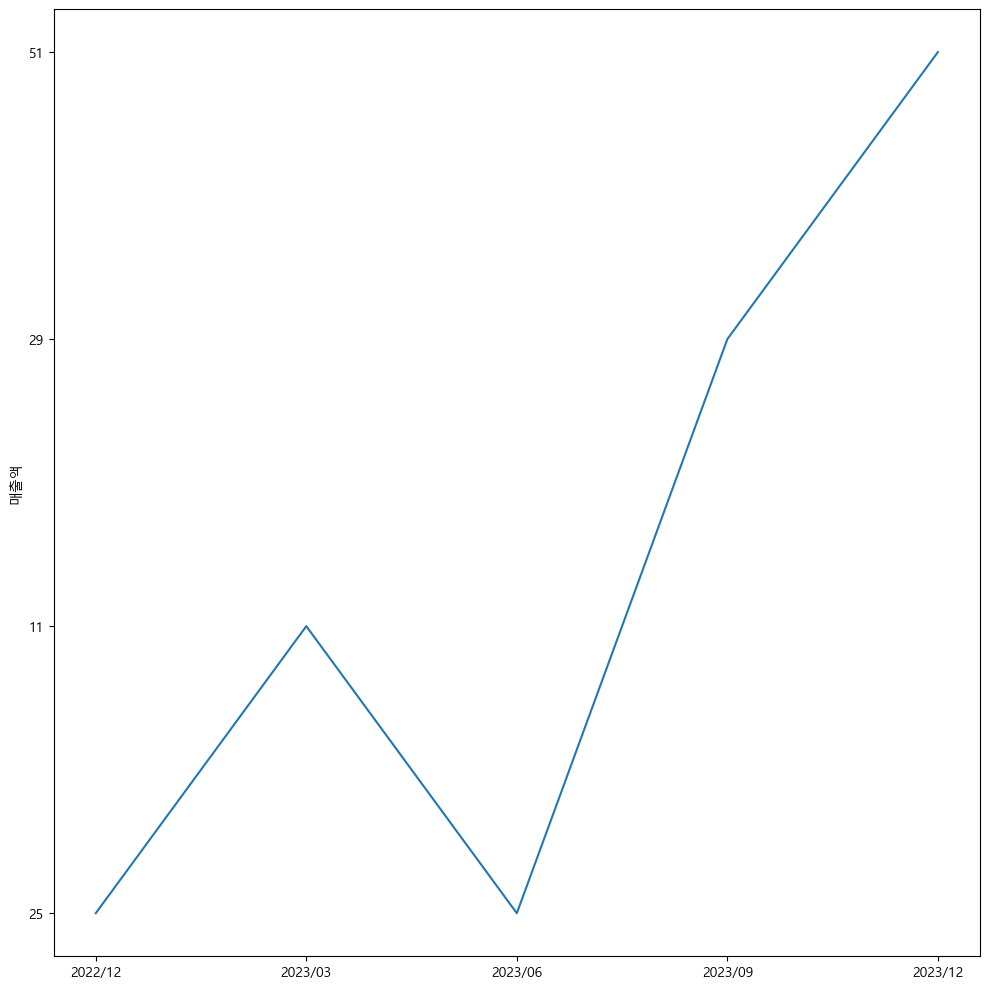

In [5]:
# 전체 그림 크기 설정 (가로 20, 세로 20)
plt.figure(figsize=(10, 10))

# 서브플롯 생성
index = 1
for i in selected_columns:
    plt.subplot(len(selected_columns), 1, index)  # 선택된 열의 개수만큼의 서브플롯 생성
    plt.plot(x_axis, y_axis[i])
    plt.ylabel(i)
    index += 1

# 그래프 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()